In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


sns.set_theme(style="whitegrid", palette="muted")


df = pd.read_csv(r'C:\Users\Maisha Fahmida\Desktop\PA\CSV file\employee_performance.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   EmpNumber                    632 non-null    object
 1   Age                          632 non-null    int64 
 2   Gender                       632 non-null    object
 3   MaritalStatus                632 non-null    object
 4   EmpJobRole                   632 non-null    object
 5   DistanceFromHomeKm           632 non-null    int64 
 6   EmpEnvironmentSatisfaction   632 non-null    int64 
 7   EmpHourlyRateEur             632 non-null    int64 
 8   EmpJobInvolvement            632 non-null    int64 
 9   EmpJobSatisfaction           632 non-null    int64 
 10  OverTimeHours                632 non-null    object
 11  EmpLastSalaryHikePercent     632 non-null    int64 
 12  EmpRelationshipSatisfaction  632 non-null    int64 
 13  TotalWorkExperienceYears     632 no

EmpNumber                      0
Age                            0
Gender                         0
MaritalStatus                  0
EmpJobRole                     0
DistanceFromHomeKm             0
EmpEnvironmentSatisfaction     0
EmpHourlyRateEur               0
EmpJobInvolvement              0
EmpJobSatisfaction             0
OverTimeHours                  0
EmpLastSalaryHikePercent       0
EmpRelationshipSatisfaction    0
TotalWorkExperienceYears       0
EmpWorkLifeBalance             0
YearsSinceLastPromotion        0
PerformanceRating              0
dtype: int64


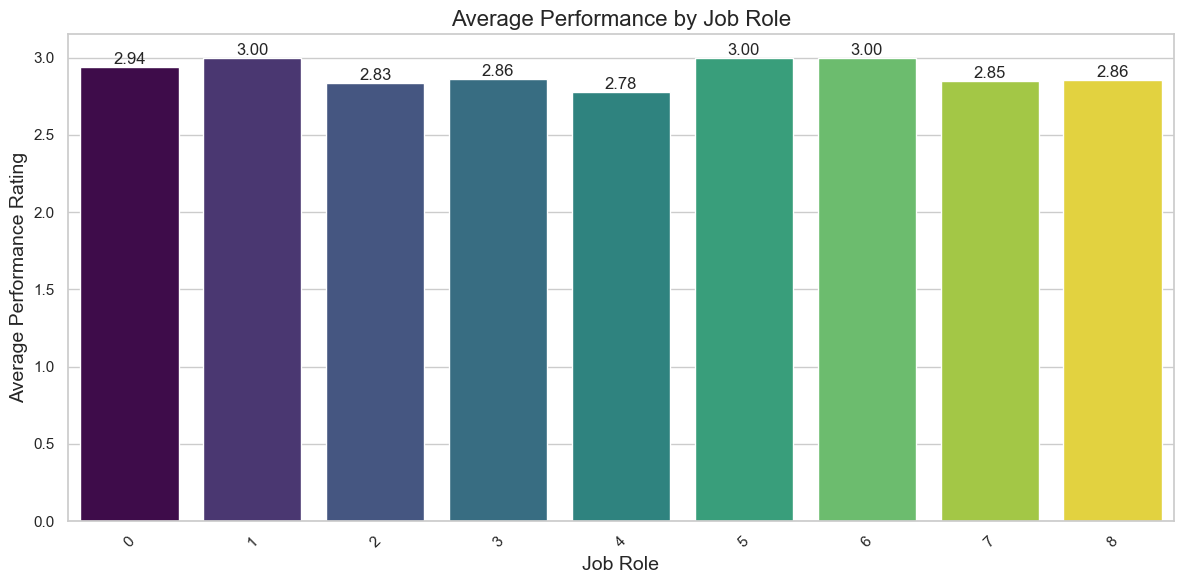

In [31]:

missing = df.isnull().sum()
print(missing)


if 'EmpJobRole' in df.columns:
    avg_perf = df.groupby('EmpJobRole')['PerformanceRating'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    bars = sns.barplot(
        x='EmpJobRole',
        y='PerformanceRating',
        hue='EmpJobRole',
        data=avg_perf,
        palette='viridis',
        legend=False
    )
    plt.xticks(rotation=45)
    plt.title('Average Performance by Job Role', fontsize=16)
    plt.ylabel('Average Performance Rating', fontsize=14)
    plt.xlabel('Job Role', fontsize=14)
    
    for p in bars.patches:
        height = p.get_height()
        bars.annotate(
            f'{height:.2f}',
            (p.get_x() + p.get_width() / 2, height),
            ha='center', va='bottom', fontsize=12
        )
    plt.tight_layout()
    plt.show()

In [19]:


drop_cols = ['Attrition', 'ExperienceYearsInCurrentRole', 'YearsWithCurrManager']
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)
df.shape

(632, 17)

In [21]:

le = LabelEncoder()
for col in ['EmpJobRole']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

df.dtypes

EmpNumber                      object
Age                             int64
Gender                         object
MaritalStatus                  object
EmpJobRole                      int32
DistanceFromHomeKm              int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRateEur                int64
EmpJobInvolvement               int64
EmpJobSatisfaction              int64
OverTimeHours                  object
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceYears        int64
EmpWorkLifeBalance              int64
YearsSinceLastPromotion         int64
PerformanceRating               int64
dtype: object

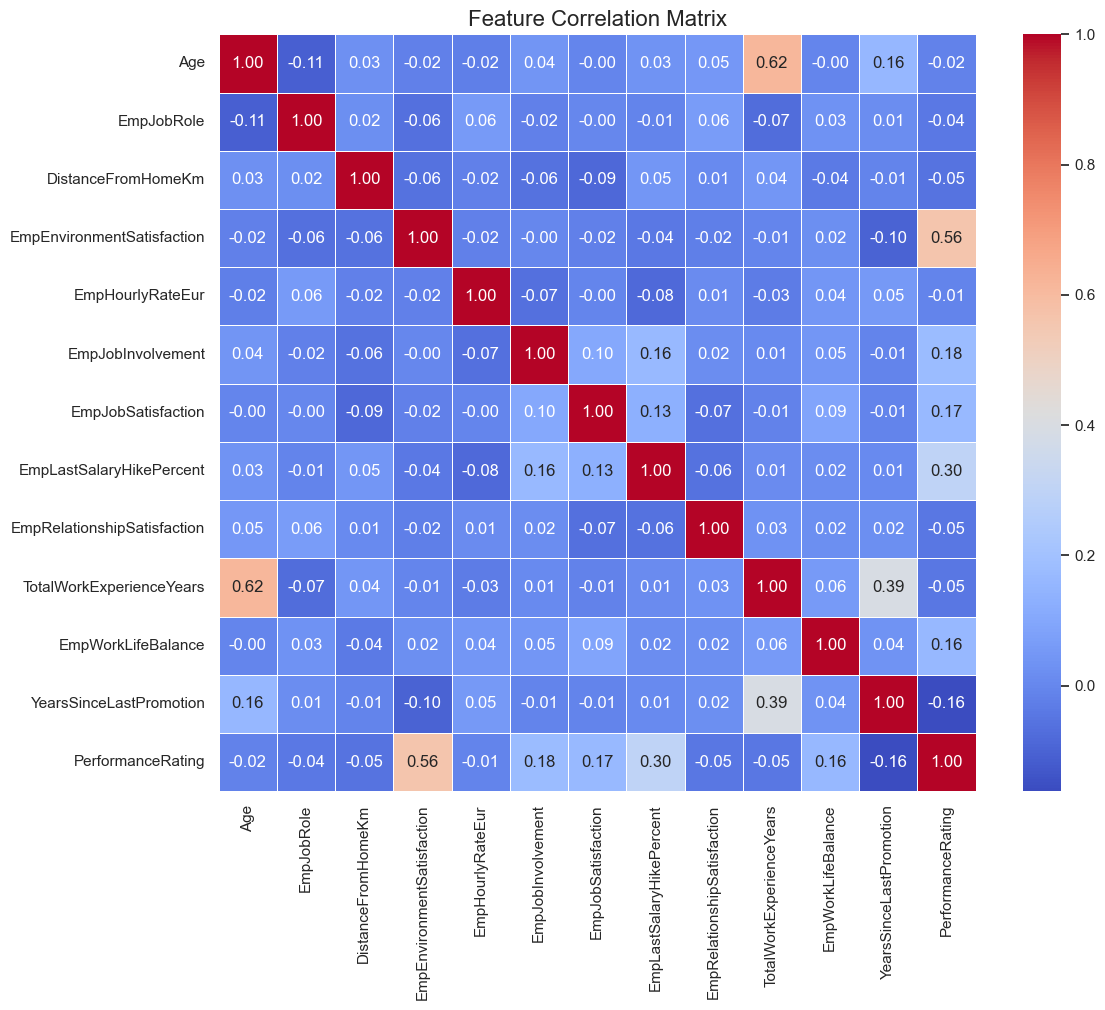

In [23]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,
    square=True
)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
X = numeric_df.drop('PerformanceRating', axis=1)
y = numeric_df['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print('Training set:', X_train.shape)
print('Test set:', X_test.shape)

Training set: (505, 12)
Test set: (127, 12)


In [27]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, preds),
        'precision': precision_score(y_test, preds, average='weighted', zero_division=0),
        'recall': recall_score(y_test, preds, average='weighted')
    }
results

{'Random Forest': {'accuracy': 0.9291338582677166,
  'precision': 0.9407533517769738,
  'recall': 0.9291338582677166},
 'SVM': {'accuracy': 0.6535433070866141,
  'precision': 0.42711885423770846,
  'recall': 0.6535433070866141},
 'Logistic Regression': {'accuracy': 0.8503937007874016,
  'precision': 0.8564835178450845,
  'recall': 0.8503937007874016}}

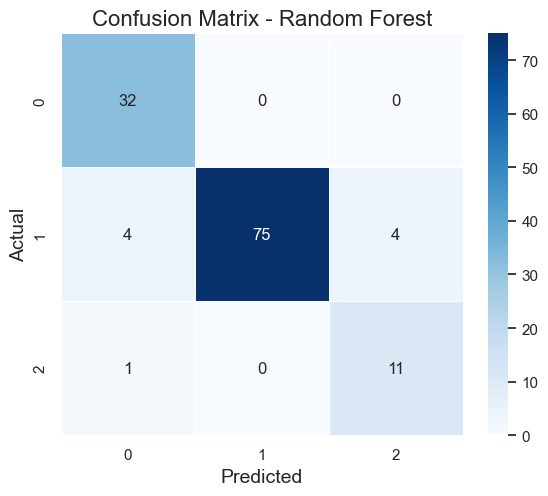

In [29]:

best_model = models['Random Forest']
preds = best_model.predict(X_test)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    square=True
)
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.tight_layout()
plt.show()